In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32

In [5]:
train_data_dir = r"E:\python\segmentation\Computer Vision\Segmentation\Data\Fer2013\train"
validation_data_dir = r"E:\python\segmentation\Computer Vision\Segmentation\Data\Fer2013\test"

In [7]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [9]:
validation_data_gen = ImageDataGenerator(
    rescale=1./255
)

In [11]:
train_generator = train_data_gen.flow_from_directory(
    train_data_dir,
    color_mode="grayscale",
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle = True
)

Found 28709 images belonging to 7 classes.


In [25]:
validation_generator = validation_data_gen.flow_from_directory(
    validation_data_dir,
    color_mode = "grayscale",
    target_size = (IMG_HEIGHT, IMG_WIDTH),
    batch_size = BATCH_SIZE,
    class_mode = "categorical",
    shuffle = True
)

Found 7178 images belonging to 7 classes.


In [27]:
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Noutral", "Sad", "Surprise"]
img, label = train_generator.__next__()

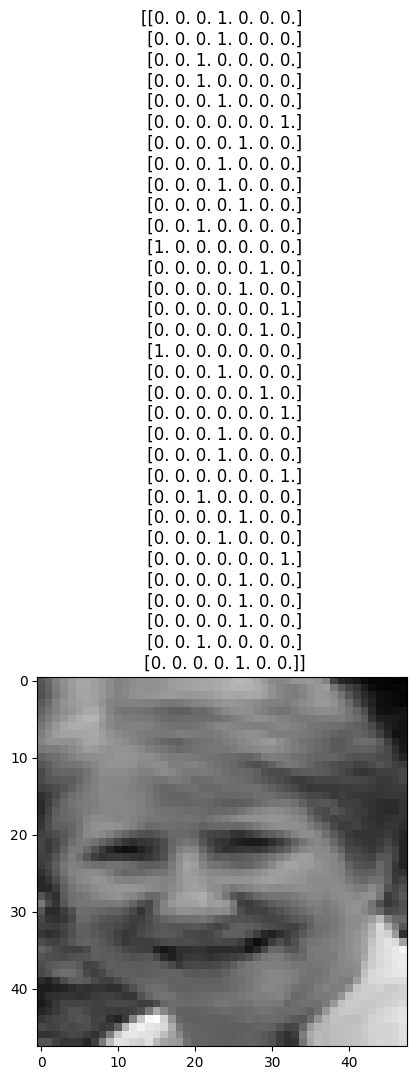

In [31]:
import random

i = random.randint(0, (img.shape[0])-1)
image = img[i]
labels = class_labels[label[i].argmax()]
plt.imshow(image[:, :, 0], cmap="gray")
plt.title(label)
plt.show()

In [35]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(48, 48, 1)),
    
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),

    Conv2D(128, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),

    Conv2D(256, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.1),    

    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.1),

    Dense(7, activation="softmax")
    
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [43]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_data_dir):
    num_train_imgs += len(files)

In [45]:
num_test_imgs = 0
for root, dirs, files in os.walk(validation_data_dir):
    num_test_imgs += len(files)

In [47]:
epochs = 50

history = model.fit(train_generator, 
                    steps_per_epoch=num_train_imgs // BATCH_SIZE,
                    epochs = epochs,
                    validation_data = validation_generator,
                    validation_steps = num_test_imgs // BATCH_SIZE)

Epoch 1/50


897/897 [==============================] - 80s 81ms/step - loss: 1.7745 - accuracy: 0.2682 - val_loss: 1.6455 - val_accuracy: 0.3520
Epoch 2/50
897/897 [==============================] - 73s 82ms/step - loss: 1.6482 - accuracy: 0.3484 - val_loss: 1.4674 - val_accuracy: 0.4321
Epoch 3/50
897/897 [==============================] - 73s 81ms/step - loss: 1.5187 - accuracy: 0.4096 - val_loss: 1.3818 - val_accuracy: 0.4686
Epoch 4/50
897/897 [==============================] - 74s 82ms/step - loss: 1.4289 - accuracy: 0.4469 - val_loss: 1.2969 - val_accuracy: 0.4944
Epoch 5/50
897/897 [==============================] - 98s 109ms/step - loss: 1.3773 - accuracy: 0.4687 - val_loss: 1.2780 - val_accuracy: 0.5040
Epoch 6/50
897/897 [==============================] - 146s 162ms/step - loss: 1.3257 - accuracy: 0.4948 - val_loss: 1.2156 - val_accuracy: 0.5409
Epoch 7/50
897/897 [==============================] - 73s 81ms/step - loss: 1.2974 - accuracy: 0.5031 - val_loss: 1.1889 - val_accu

In [51]:
model.save("emotion_detection_model_100epochs.h5")

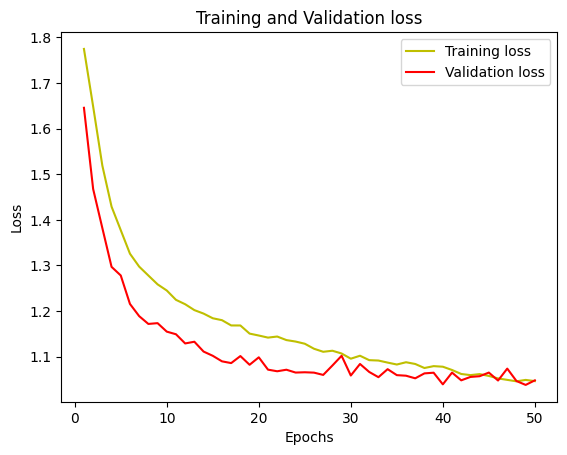

In [53]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "y", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

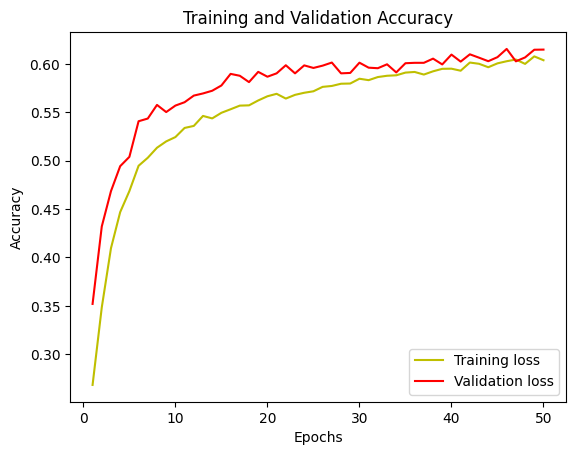

In [59]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "y", label="Training loss")
plt.plot(epochs, val_acc, "r", label="Validation loss")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [61]:
from keras.models import load_model

In [63]:
my_model = load_model("emotion_detection_model_100epochs.h5", compile=False)

In [65]:
test_img, test_label = validation_generator.__next__()
prediction = my_model.predict(test_img)

1/1 [==============================] - 1s 693ms/step


In [73]:
prediction = np.argmax(prediction, axis=1)
test_label = np.argmax(test_label, axis=1)

In [75]:
from sklearn import metrics

In [77]:
print("Accuracy = " ,metrics.accuracy_score(test_label, prediction))

Accuracy =  0.71875


In [79]:
from sklearn.metrics import confusion_matrix

In [81]:
cm = confusion_matrix(test_label, prediction)

In [83]:
import seaborn as sns

<Axes: >

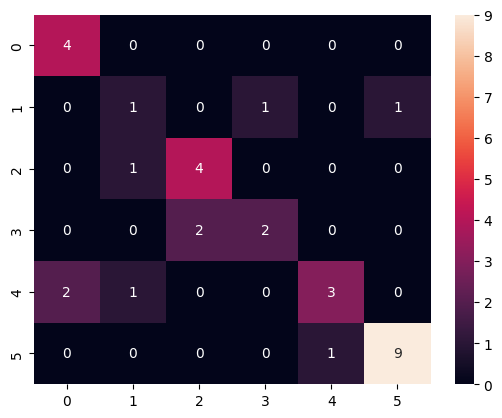

In [85]:
sns.heatmap(cm, annot=True)

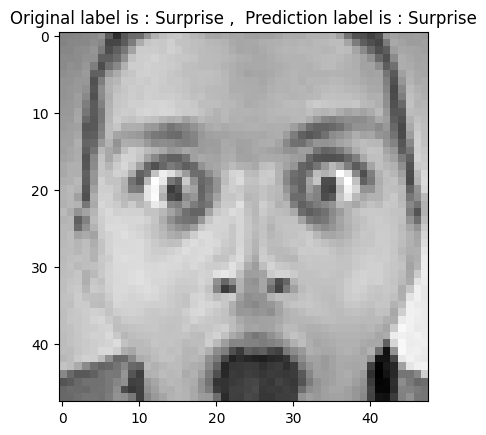

In [113]:
class_labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

n = random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_label = class_labels[test_label[n]]
pred_label = class_labels[prediction[n]]
plt.imshow(image[:, :, 0], cmap="gray")
plt.title("Original label is : " +orig_label+ " ,  Prediction label is : " +pred_label)
plt.show()